In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [37]:
import os, glob
runs_PSO = []
for filename in glob.glob('PSO/*'):
    with open(filename, 'rb') as f:
        runs_PSO.append(np.load(f))

runs_PSO = np.array(runs_PSO)

In [68]:
with open('BO_runs10_calls32', 'rb') as f:
    runs_BO_f = np.load(f, allow_pickle = True)
runs_BO = np.zeros((10,32))
for i, run in enumerate(runs_BO_f):
    for j, call in enumerate(run):
        runs_BO[i,j] = float(call['target'])

with open('TPE_runs10_calls32', 'rb') as f:
    runs_TPE = np.load(f, allow_pickle = True)

with open('RS_runs10_calls32.npy', 'rb') as f:
    runs_RS = np.load(f, allow_pickle = True)

with open('CMAES_runs10_calls32.npy', 'rb') as f:
    runs_CMAES = np.load(f, allow_pickle = True)

In [92]:
with open('acc_context_env.npy', 'rb') as f:
    runs_PPO1 = np.load(f, allow_pickle = True)

In [93]:
with open('acc_continuous_env.npy', 'rb') as f:
    runs_PPO2 = np.load(f, allow_pickle = True)

In [7]:
b.shape

(10, 32)

In [157]:
import time
int(time.time())

1679530375

In [133]:
def plot_means(datas, names=None, figsize=(14,10), xlabel='iterations', ylabel='best value'):
    list_color = ['indigo', 'firebrick', 'steelblue', 'lime', 'orange', 'crimson']
    #plt.style.use('bmh')
    plt.figure(figsize=figsize)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i, data in enumerate(datas) :
        minn = np.min(data, axis=0)
        maxx = np.max(data, axis=0)
        mean = np.mean(data, axis=0)
        if names != None :
            plt.plot(np.arange(data.shape[1]), mean, linewidth=2.5, color=list_color[i], label=names[i])
        else :
            plt.plot(np.arange(data.shape[1]), mean, linewidth=2.5, color=list_color[i])
        plt.fill_between(np.arange(data.shape[1]), minn, maxx, alpha=0.2, color=list_color[i])
    if names != None:
        plt.legend(loc="lower right")
    plt.margins(0, 0)
    plt.plot()
    

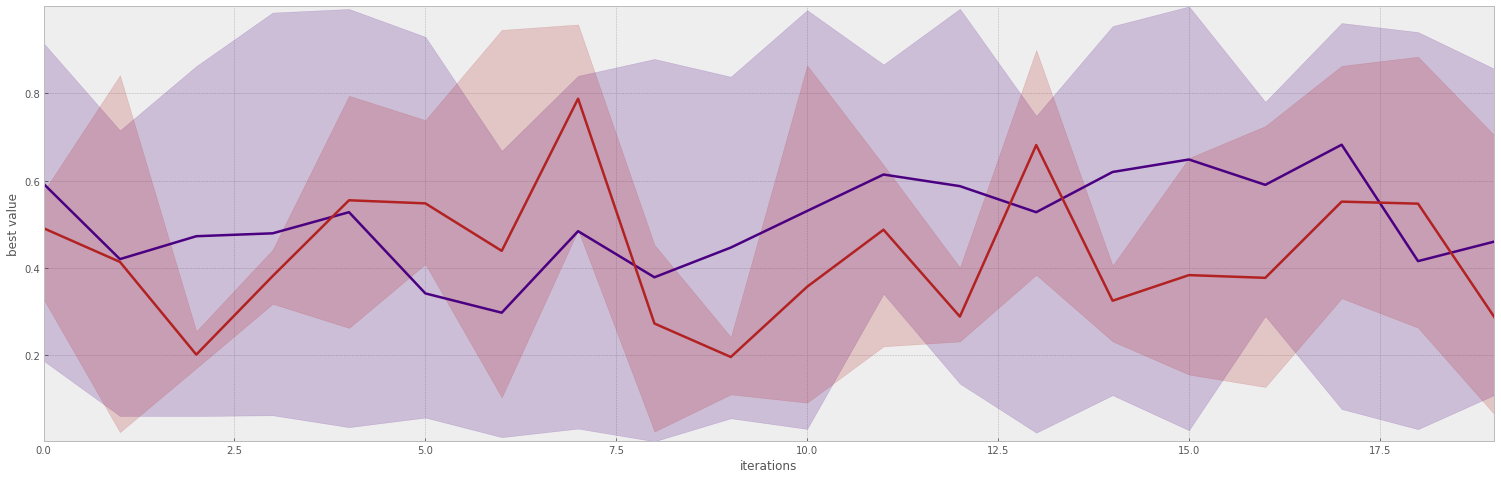

In [96]:
plot_means([x, y])

In [10]:
# Conserve à l'étape i d'un run la valeur max des étapes précédentes
def transform_max(datas):
    datas_transformed = []
    for data in datas:
        data_transformed = []
        for run in data:
            run_transformed = []
            max_value = run[0]
            for call in run:
                if max_value < call :
                    max_value = call
                run_transformed.append(max_value)
            data_transformed.append(run_transformed)
        datas_transformed.append(np.array(data_transformed))

    return datas_transformed

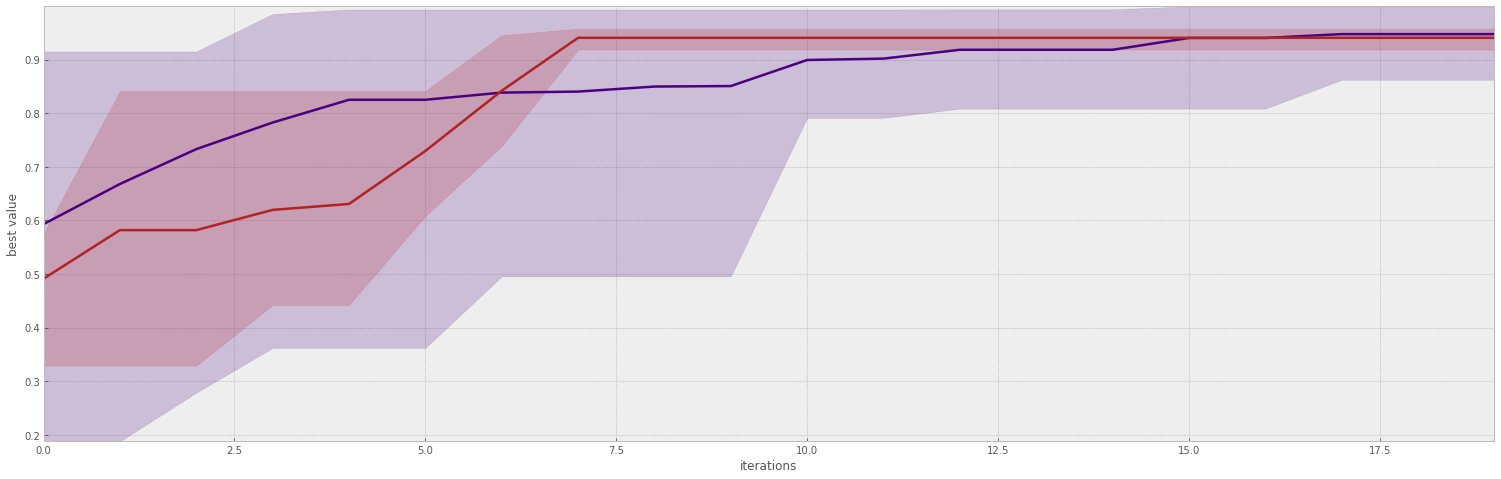

In [126]:
transformed_datas = transform_max([x, y])
plot_means(transformed_datas)

In [75]:
def plot_bar(datas):
    max_values = []
    for data in datas :
        max_values.append(np.mean(np.max(data, axis=1)))
    
    plt.bar(np.arange(len(max_values)), max_values, 0.3 , color='firebrick', n)

    plt.show()

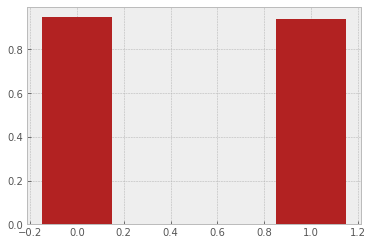

In [148]:
plot_bar([x, y])

#Problème 2 graphiques

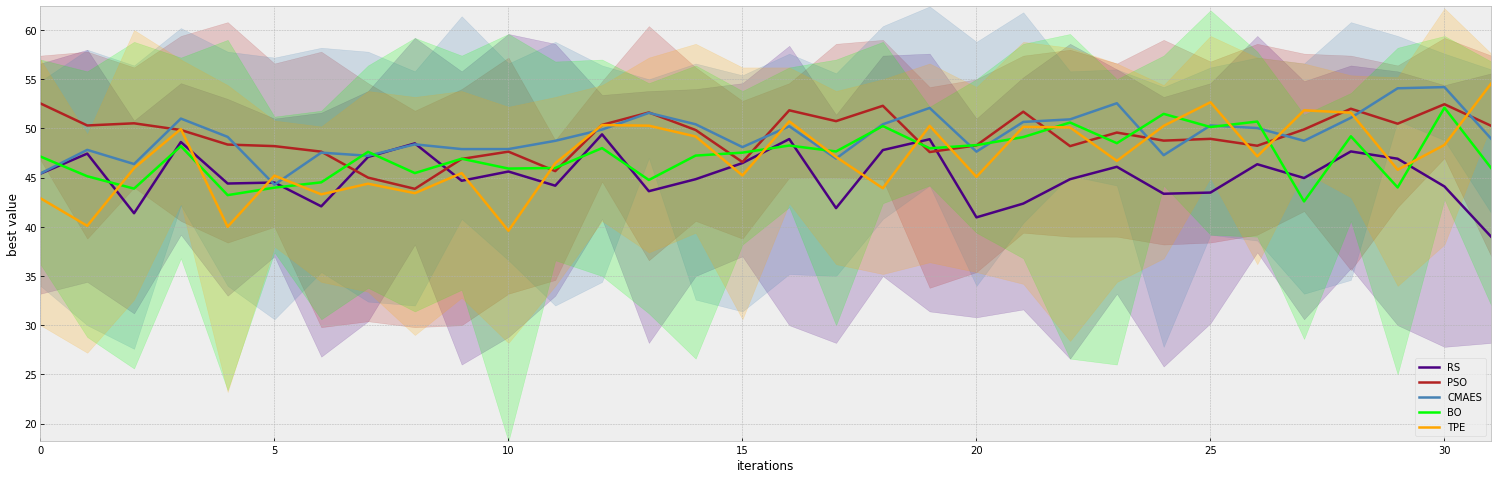

In [87]:
plot_means([runs_RS, runs_PSO, runs_CMAES, runs_BO, runs_TPE], ['RS', 'PSO', 'CMAES', 'BO', 'TPE'])

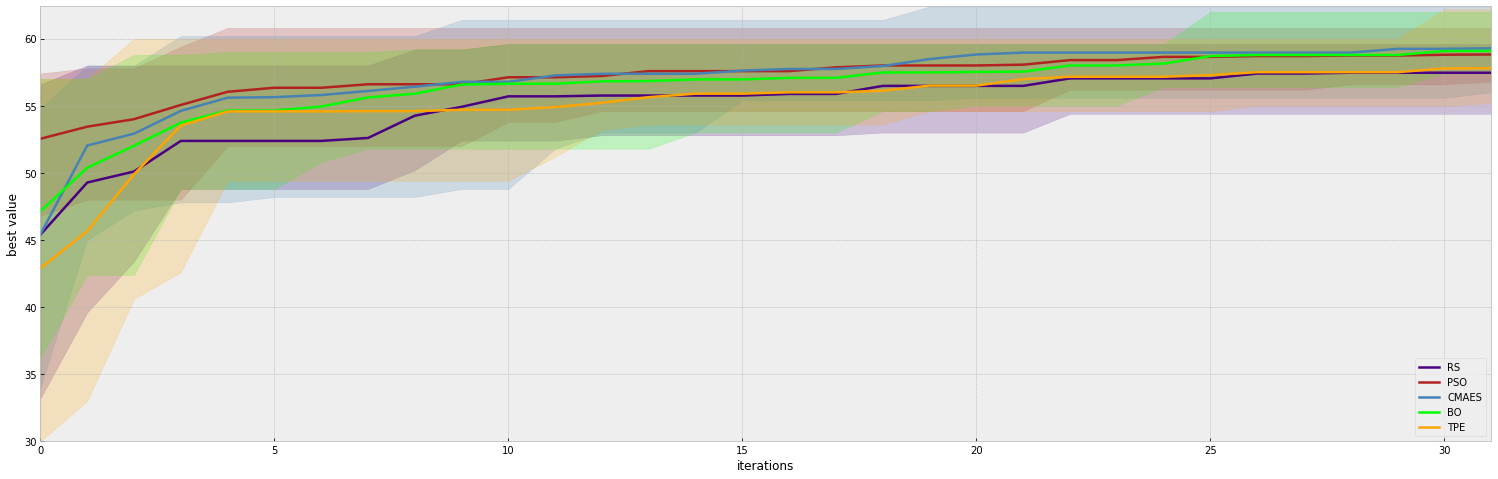

In [88]:
plot_means(transform_max([runs_RS, runs_PSO, runs_CMAES, runs_BO, runs_TPE]), ['RS', 'PSO', 'CMAES', 'BO', 'TPE'])

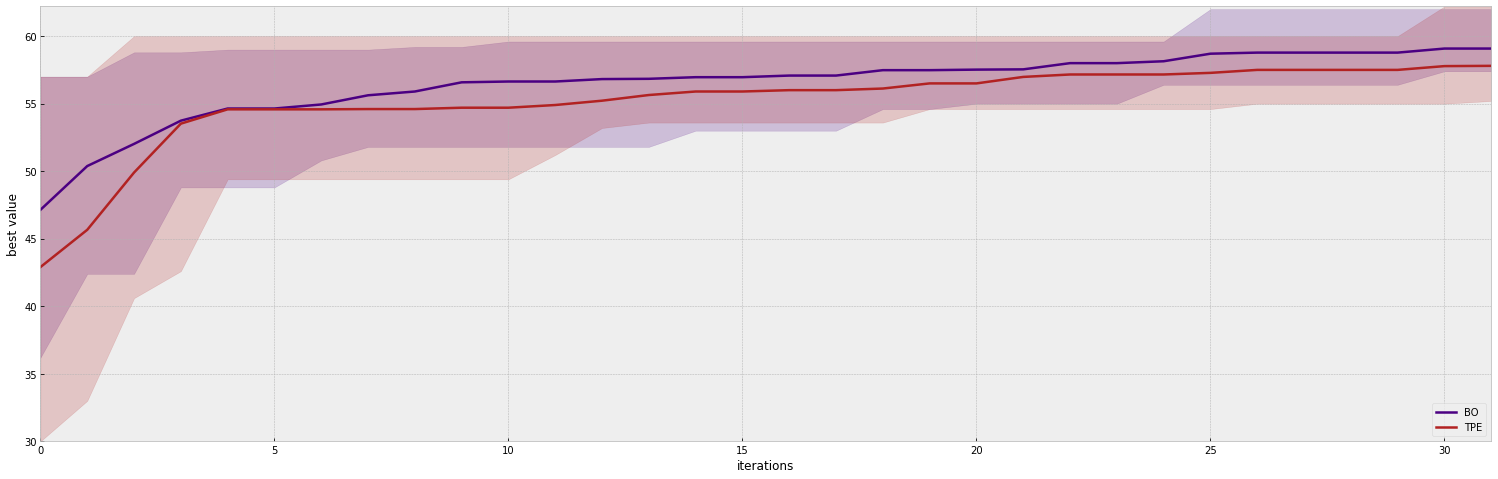

In [86]:
plot_means(transform_max([runs_BO, runs_TPE]), names=["BO", "TPE"])

In [128]:
runs_PPO1 = runs_PPO1[:,:-1]
runs_PPO2 = runs_PPO2[:,:-1]

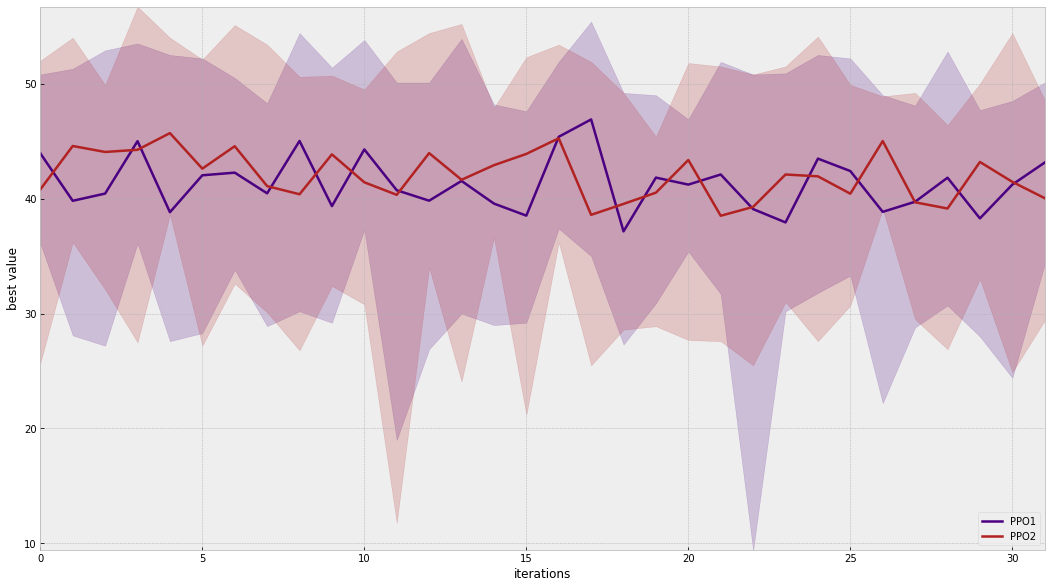

In [129]:
plot_means([runs_PPO1, runs_PPO2], names=["PPO1", "PPO2"])

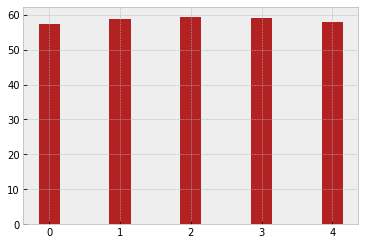

In [76]:
plot_bar([runs_RS, runs_PSO, runs_CMAES, runs_BO, runs_TPE])

In [90]:
def values(datas, names):
    for i, data in enumerate(datas):
        print(f"Méthode {names[i]}")
        print("mean : ", np.mean(np.max(data, axis=1)))
        print("var : ", np.var(np.max(data, axis=1)))
        print("max : ", np.max(np.max(data, axis=1)))
        print("min : ", np.min(np.max(data, axis=1)))

In [166]:
values([runs_RS, runs_PSO, runs_CMAES, runs_BO, runs_TPE], ['RS', 'PSO', 'CMAES', 'BO', 'TPE'])

Méthode RS
mean :  57.459999999999994
var :  3.224400000000004
max :  59.6
min :  54.4
Méthode PSO
mean :  58.81999999999999
var :  1.4116000000000004
max :  60.8
min :  56.8
Méthode CMAES
mean :  59.279999999999994
var :  4.113599999999998
max :  62.4
min :  56.0
Méthode BO
mean :  59.080000000000005
var :  1.4896000000000018
max :  62.0
min :  57.4
Méthode TPE
mean :  57.8
var :  3.904000000000001
max :  62.2
min :  55.2


In [167]:
values([runs_PPO1, runs_PPO2], ["PPO1", "PPO2"])

Méthode PPO1
mean :  53.35
var :  1.2365000000000022
max :  55.400000000000006
min :  52.0
Méthode PPO2
mean :  54.05
var :  2.264499999999997
max :  56.699999999999996
min :  51.2


In [108]:
from sklearn.linear_model import LinearRegression

In [153]:
def get_coef(datas, names, size=32):
    models = []
    for i, data in enumerate(datas):
        print(names[i])
        rmean = np.mean(data, axis=0)
        model = LinearRegression().fit(np.arange(size).reshape(-1,1), np.array(rmean).reshape(-1,1))
        models.append(model)
        print("coef : ", model.coef_)

    return models

In [136]:
models = get_coef([runs_RS, runs_PSO, runs_CMAES, runs_BO, runs_TPE, runs_PPO1, runs_PPO2], ['RS', 'PSO', 'CMAES', 'BO', 'TPE', 'PPO1', 'PPO2'])

RS
coef :  [[-0.0444978]]
PSO
coef :  [[0.06098607]]
CMAES
coef :  [[0.14533724]]
BO
coef :  [[0.12299487]]
TPE
coef :  [[0.25826246]]
PPO1
coef :  [[-0.04067815]]
PPO2
coef :  [[-0.09198864]]


In [142]:
def plot_models(models, datas, names):
    for i, model in enumerate(models):
        plt.figure()
        plt.plot(np.arange(32), np.mean(datas[i], axis=0))
        plt.plot(np.arange(32), model.predict(np.arange(32).reshape(-1,1)), label=names[i])
        plt.legend(loc="lower right")
        plt.savefig(f'figs_pb2/{names[i]}_fig.png')

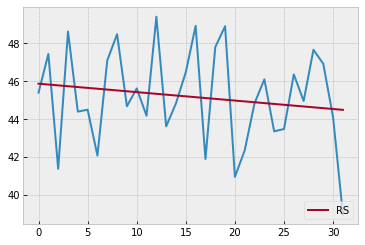

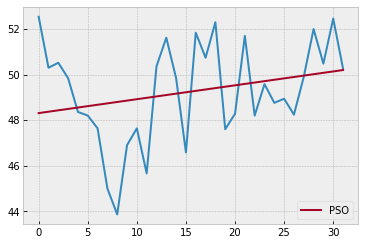

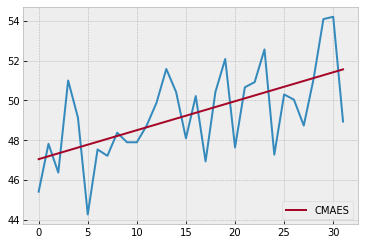

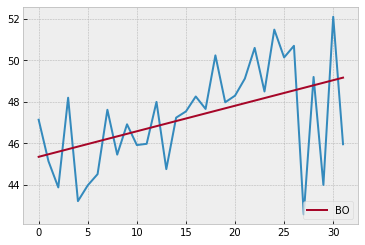

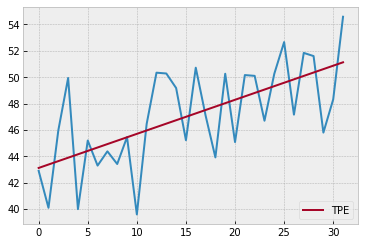

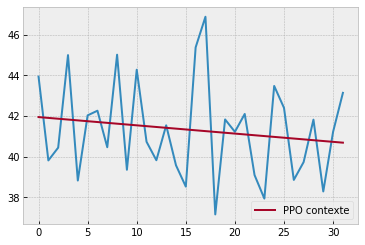

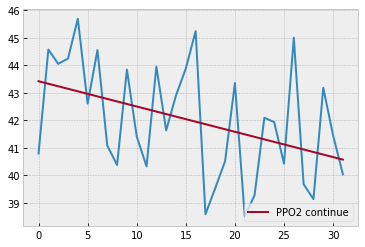

In [143]:
plot_models(models,[runs_RS, runs_PSO, runs_CMAES, runs_BO, runs_TPE, runs_PPO1, runs_PPO2], ['RS', 'PSO', 'CMAES', 'BO', 'TPE', 'PPO contexte', 'PPO2 continue'])

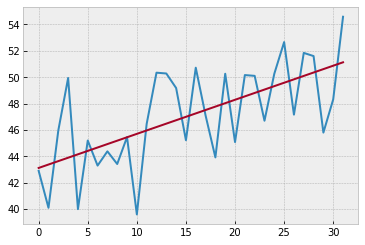

In [132]:
plt.plot(np.arange(32), np.mean(runs_TPE, axis=0))
plt.plot(np.arange(32), model[0].predict(np.arange(32).reshape(-1,1)))

#Problème 1 graphiques

In [148]:
datas_1 = []
names_1 = []
for filename in glob.glob('pb1/*'):
    with open(filename, 'rb') as f:
        datas_1.append(np.load(f, allow_pickle = True))
        names_1.append(filename.split("_")[0][4:])

In [149]:
names_1

['BO', 'CMAES', 'PSO', 'RS', 'TPE']

In [ ]:
values(datas_1, names_1)

In [ ]:
plot_means(datas_1, names_1)

In [163]:
np.mean(datas_1[2], axis=0) - np.mean(datas_1[3], axis=0)

array([ 6.34292929, 13.93484848, 15.1520202 , 17.64242424, 19.91363636,
       19.42626263, 14.18232323, 17.17626263, 17.32626263, 16.69393939,
       13.08383838, 14.96969697, 20.16919192, 24.28535354, 13.68181818,
       15.1969697 , 21.35656566, 14.82575758, 19.21464646, 25.86111111,
       27.17222222, 18.19848485, 15.22828283, 17.76212121, 14.05757576,
       19.97979798, 16.1989899 , 17.81262626, 18.92878788, 17.11414141,
       20.10454545, 18.48484848, 23.01717172, 24.15959596, 20.82929293,
       14.95858586, 27.33484848, 23.74747475, 24.95454545, 26.87878788,
       20.47424242, 26.99494949, 22.00707071, 26.49242424, 21.32070707,
       30.01313131, 24.97121212, 24.09545455, 29.91767677, 22.44343434])

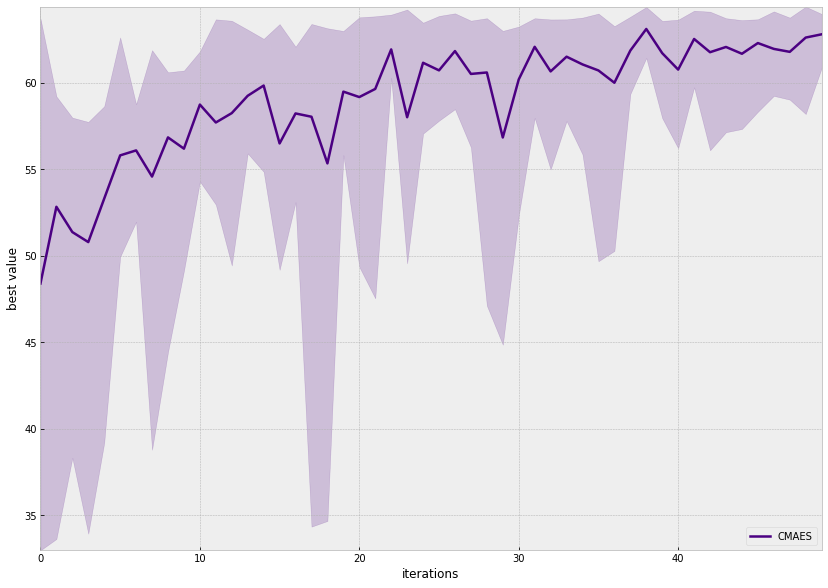

In [169]:
plot_means([datas_1[1]], [names_1[1]]) #CMAES

In [154]:
get_coef(datas_1, names_1, 50)

BO
coef :  [[0.02890426]]
CMAES
coef :  [[0.19885392]]
PSO
coef :  [[0.20407009]]
RS
coef :  [[-0.02623023]]
TPE
coef :  [[0.23843719]]


[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]